Time series Forecasting - with ARIMA Model

In [135]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [136]:
# for removing warnings 

import warnings
warnings.filterwarnings('ignore')

Step - 1 
 
  Read the data

In [137]:

df = pd.read_csv("trend2.csv", parse_dates=['Date'], index_col=['Date'])


In [138]:
df.head()

,sales
Date,
2010-01-01,4369
2010-01-06,1122
2010-01-07,2557
2010-01-10,9372
2010-01-13,2964


In [139]:
df.describe()

,sales
count,1000.000000
mean,5053.988000
std,2901.375317
min,13.000000
25%,2420.250000
50%,5184.000000
75%,7536.750000
max,9998.000000


Step - 2 Resampling

Aggregation of data.

Daily > monthly

Monthly > Annually

Alias                   Description

A               Year End

M               Month End

W               Weekly

D               Daily

MS              Month start

.sum or .mean

In [140]:
# Resample and compute the sum
ts = df['sales'].resample('M').sum()


In [141]:
ts

Date
2010-01-31    48615
2010-02-28    70796
2010-03-31    44103
2010-04-30    55611
2010-05-31    57907
              ...  
2017-03-31    77547
2017-04-30    34737
2017-05-31    49201
2017-06-30    40293
2017-07-31    54436
Freq: M, Name: sales, Length: 91, dtype: int64

<Axes: xlabel='Date'>

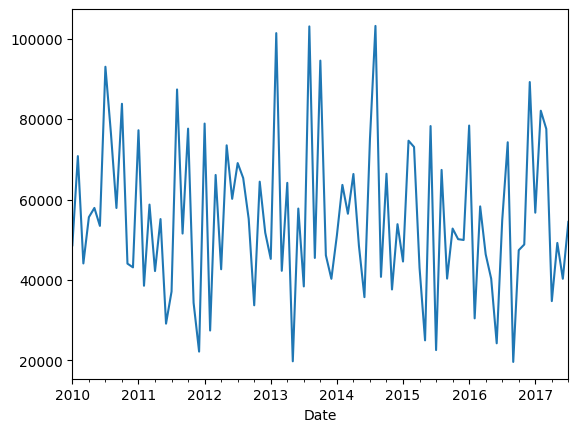

In [142]:
ts.plot()

Step-3              Stationarity check

In [143]:
# pip install statsmodels

In [144]:
import statsmodels.api as sm

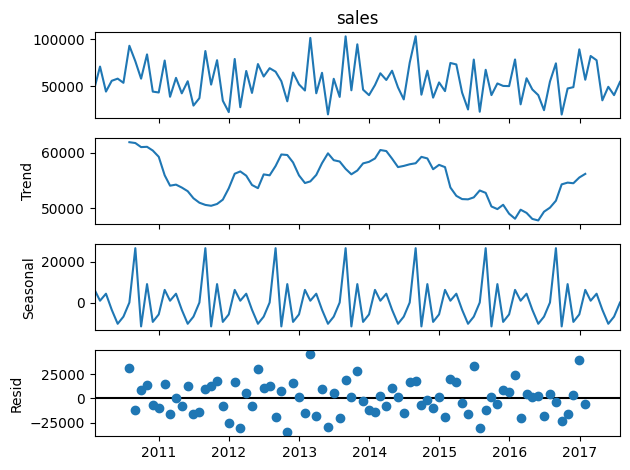

In [145]:
decomposition = sm.tsa.seasonal_decompose(ts, model='addictive')
fig = decomposition.plot()
plt.show()

In [146]:
from statsmodels.tsa.stattools import adfuller

In [147]:
adftest = adfuller(ts)

In [148]:
print("pvalue of adfuller test is :", adftest[1])

pvalue of adfuller test is : 3.8642994167922064e-22


step-4 Train test split

In [149]:
len(ts)

91

In [150]:
train=ts[:64]
test=ts[64:]

In [151]:
len(train), len(test)

(64, 27)

ARIMA - Non seasonal Time Series

Seasonal ARIMA - Seasonal Time Series

ARIMA - AR, MA, INTEGRATED

AR - Auto regression

MA - Moving Average

Integrated - Differencing

Araima Model building:

Araima model has three components.

1.AR - Auto regression

2.MA - Moving Average

3.Integrated order d - Differencing

Regression with its past values:

    Yt = a + B1tY(t-1) +B2Y(t-2)+B3Y(t-3)+Error1

Sales Dec = A +B1Sales(November)+B2Sales(october)+B3Sales(September)+Error1

P = Order of AR : p = 3 that means YT is dependant on past 3 periods.

P from PACF Plot.

PACF is a plot that shows the correlation of a series with its lagged values.

MA. YT depends on ERROR of the previous lagged values.
Yt = A+ Et +B1E(t-1) + B2E(t-2)

MA says that Yt has the effects of previous error terms in it.

q is order of MA

q from ACF plots

Integrated - Differencing

    We difference the data to remove trend and seasonality to make it stationarity
    D is Order: How many times we difference the data

Classical Method:

    Using ACF PACF plots.
    Auto_ARIMA function
    For Loop

Steps6: Build ARIMA Model

#p = 5, d = 0, q = 4

#HOW to get POQ, 3 different methods discussed below.

In [152]:
# from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.arima.model import ARIMA

In [153]:
model = ARIMA(train, order = (5,0,4)).fit()

Step - 7: Predict the test data



In [154]:
x = len(train)
y = len(ts)-1
x,y

(64, 90)

In [155]:
pred = model.predict(start = len(train),end=(len(ts)-1))

In [156]:
pred.head()

2015-05-31    54991.169949
2015-06-30    39372.082365
2015-07-31    54571.914088
2015-08-31    67349.209248
2015-09-30    70781.276524
Freq: M, Name: predicted_mean, dtype: float64

Step:8 Model Evaluation

In [157]:
from sklearn.metrics import mean_squared_error

In [158]:
error = np.sqrt(mean_squared_error(test, pred))
error

21586.87000254891

error and np.sqrt(test.var()) are having different values , so we have to another model.

In [159]:
test.mean(), np.sqrt(test.var())

(51612.25925925926, 19415.30573184385)

<Axes: xlabel='Date'>

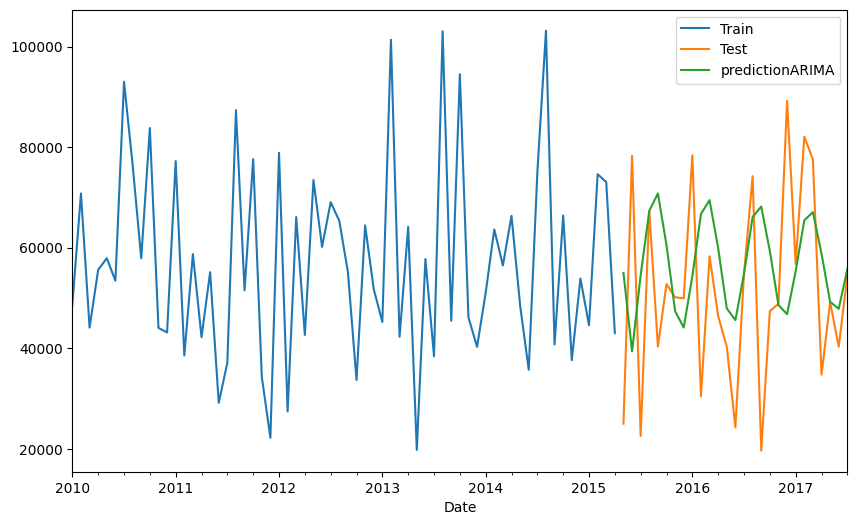

In [160]:
train.plot(legend =- True, label ='Train', figsize = (10,6))
test.plot(legend = True, label = 'Test')
pred.plot(legend = True, label = 'predictionARIMA')

Step - 9 Predit Future Data

In [161]:
final_model = ARIMA(ts, order=(5,0,4)).fit()#build on full dataset

In [162]:
prediction = final_model.predict(len(ts), len(ts)+6)

<Axes: xlabel='Date'>

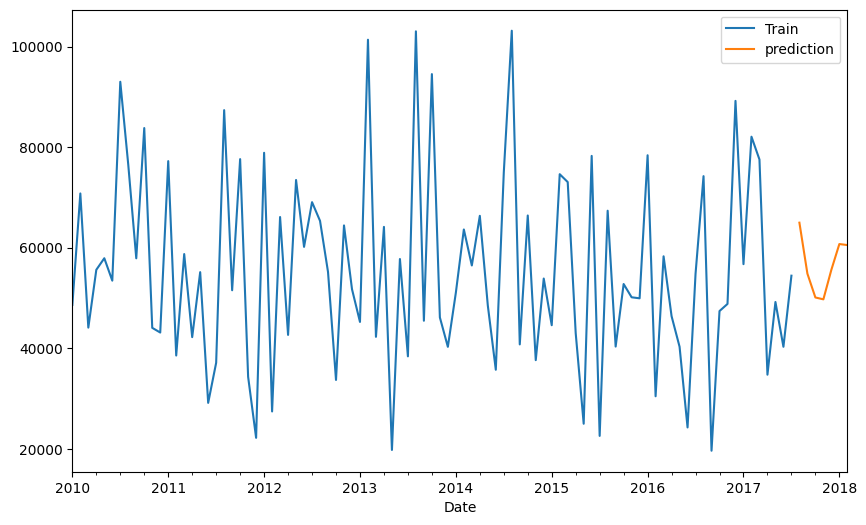

In [163]:
ts.plot(legend = True, label = 'Train', figsize = (10,6))
prediction.plot(legend = True, label = 'prediction')

How to Get ARIMA Hyperparameters p d q

1. Method ACF PACF plots
2. AUTO_ARIMA function
3. for loop

In [164]:
import itertools

In [165]:
p = range(0,8)
q = range(0,8)
d = range(0,8)

In [166]:
pdq_combination = list(itertools.product(p,d,q))

In [167]:
len(pdq_combination)

512

In [168]:
rmse = []
order = []

The below code infinite amount of time to execute. So discarded

In [169]:
for pdq in pdq_combination:
    try:
        model = ARIMA(train, order=pdq).fit()
        pred = model.predict(start=len(train), end=(len(ts)-1))
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.apped(error)
    except:
        continue

# GPT code for the previous one.  

In [170]:
# import numpy as np
# import pandas as pd
# from statsmodels.tsa.arima_model import ARIMA
# from sklearn.metrics import mean_squared_error

# # Example data (replace this with your actual data)
# train = np.random.rand(80)
# test = np.random.rand(20)

# # Define the range of p, d, and q values you want to try
# p_values = [0, 1, 2]
# d_values = [0, 1]
# q_values = [0, 1, 2]

# best_pdq = None
# best_rmse = float('inf')

# # Loop over all combinations of p, d, and q
# for p in p_values:
#     for d in d_values:
#         for q in q_values:
#             pdq = (p, d, q)
#             try:
#                 model = ARIMA(train, order=pdq).fit()
#                 pred = model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
#                 error = np.sqrt(mean_squared_error(test, pred))
#                 if error < best_rmse:
#                     best_rmse = error
#                     best_pdq = pdq
#             except Exception as e:
#                 print(f"Error for pdq={pdq}: {str(e)}")

# if best_pdq is not None:
#     print(f"Best (p, d, q): {best_pdq}")
#     print(f"Best RMSE: {best_rmse}")
# else:
#     print("No valid model fits found.")


# Normal codes

In [171]:
results = pd.DataFrame(index = order1, data = rmse, columns = ['RMSE'])

In [172]:
results.to_csv('ARIMA_result.csv')

# GPT code the previous three blocks

In [173]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# Example data (replace this with your actual data)
train = np.random.rand(80)
test = np.random.rand(20)

# Define the range of p, d, and q values you want to try
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]

order1 = []  # To store the (p, d, q) values
rmse = []    # To store the RMSE values

# Loop over all combinations of p, d, and q
for p in p_values:
    for d in d_values:
        for q in q_values:
            pdq = (p, d, q)
            try:
                model = ARIMA(train, order=pdq).fit()
                pred = model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
                error = np.sqrt(mean_squared_error(test, pred))
                order1.append(pdq)
                rmse.append(error)
            except Exception as e:
                continue

# Create a DataFrame with the results
results = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])

# Save the results to a CSV file
results.to_csv('ARIMA_result1.csv')


# ACF PACF

In [174]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

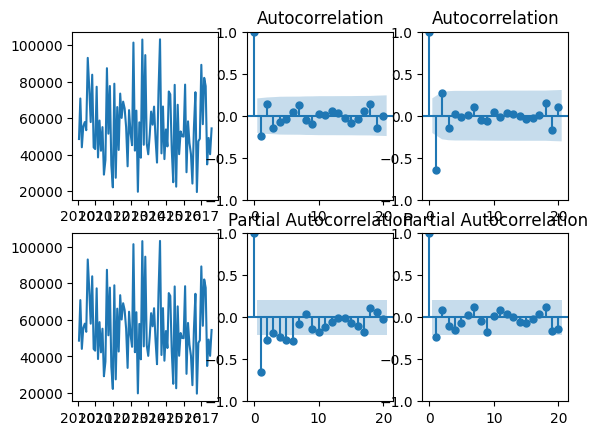

In [175]:
fig,axes = plt.subplots(2,3)
axes[0,0].plot(ts)
plot_acf(ts,ax=axes[0,1])
plot_acf(ts.diff().dropna(), ax=axes[0,2])
axes[1,0].plot(ts)
plot_pacf(ts.diff().dropna(), ax = axes[1,1])
plot_pacf(ts.dropna(), ax=axes[1,2])
plt.show()

# Auto_ARIMA

In [176]:
# pip install pmdarima


In [177]:
import pmdarima

In [178]:
from pmdarima import auto_arima
auto_arima(train, m=12, start_P = 0, seasonal = True, d=1, trace = True, error_actions = 'ignore', supress_warnings = True, stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=76.127, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=65.204, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=74.141, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=65.036, Time=0.04 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=65.024, Time=0.17 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=66.999, Time=0.35 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=66.985, Time=0.30 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=76.058, Time=0.12 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=49.296, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=50.060, Time=0.11 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=51.034, Time=0.44 sec
 ARIMA(2,1,0)(0,0,2)[12] intercept   : AIC=50.810, Time=

ARIMA(order=(5, 1, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True)

In [179]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already loaded and preprocessed your training data
# train = ...

# Fit the ARIMA model with the suggested parameters
model = ARIMA(train, order=(1, 1, 2))
fitted_model = model.fit()

# Specify the number of time steps to forecast
n = 10

# Set the confidence level (e.g., 95%)
confidence_level = 0.95

# Get the prediction results
prediction_results = fitted_model.get_prediction(start=len(train), end=len(train) + n - 1, dynamic=False)

# Extract the forecasted values
forecasted_values = prediction_results.predicted_mean

# Extract the confidence intervals
conf_int = prediction_results.conf_int(alpha=1-confidence_level)

# Create a DateTime index for the forecasted values
forecast_index = pd.date_range(start=train.index[-1], periods=n, freq=train.index.freq)

# Create a comparison plot
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train', color='blue')
plt.plot(forecast_index, forecasted_values, label='Prediction', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='95% CI')
plt.legend()
plt.xlabel('Time Period')
plt.ylabel('Value')
plt.title('ARIMA Model Forecast vs. Training Data')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'index'